In [3]:
import requests
import pandas as pd
from time import sleep
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Define the base URL for the API
base_url = "https://data.cityofnewyork.us/resource/8h9b-rp9u.json"

# Define headers including the app token
headers = {
    'X-App-Token': 'gcDEQgxy8Z5tdm905ovo9OhrQ'
}

# Function to handle pagination, fetch all data, and implement a delay between requests
def fetch_all_data(base_url, headers):
    limit = 50000  # Adjust the limit as needed, depending on what the API allows
    offset = 0
    full_data = []

    while True:
        # Construct the query with pagination and date filtering
        query_url = f"{base_url}?$limit={limit}&$offset={offset}" \
                    f"&$where=ARREST_DATE between '2014-01-01T00:00:00.000' and '2023-12-31T23:59:59.999'"
        
        response = requests.get(query_url, headers=headers)
        if response.status_code != 200:
            print(f"Failed to fetch data: HTTP Status Code {response.status_code}")
            break
        
        data = response.json()
        if not data:
            break  # Break the loop if no more data is returned
        
        full_data.extend(data)
        offset += limit
        
        # Sleep for 5 seconds before making the next request
        sleep(5)
    
    return full_data

# Fetch all data using the defined function
all_data = fetch_all_data(base_url, headers)

# Create a DataFrame from the fetched data
historical_df = pd.DataFrame(all_data)

# Display the first few rows of the DataFrame to verify it
print(historical_df.head())
print(f"Total rows fetched: {len(original_df)}")

  arrest_key              arrest_date pd_cd                          pd_desc  \
0   94273780  2014-01-01T00:00:00.000   397  ROBBERY,UNCLASSIFIED,OPEN AREAS   
1   94272165  2014-01-01T00:00:00.000   205             TRESPASS 2, CRIMINAL   
2   94273806  2014-01-01T00:00:00.000   750                 RESISTING ARREST   
3   94272052  2014-01-01T00:00:00.000   109         ASSAULT 2,1,UNCLASSIFIED   
4   94259980  2014-01-01T00:00:00.000   101                        ASSAULT 3   

  ky_cd                               ofns_desc    law_code law_cat_cd  \
0   105                                 ROBBERY  PL 1601001          F   
1   352                       CRIMINAL TRESPASS  PL 1401500          M   
2   359  OFFENSES AGAINST PUBLIC ADMINISTRATION  PL 2053000          M   
3   106                          FELONY ASSAULT  PL 1200501          F   
4   344            ASSAULT 3 & RELATED OFFENSES  PL 1200001          M   

  arrest_boro arrest_precinct jurisdiction_code age_group perp_sex  \
0   

NameError: name 'original_df' is not defined

In [5]:
print(historical_df.shape[0])

2502242


In [14]:
# Converting the list of data into a DataFrame
historical_df = pd.DataFrame(all_data)
historical_df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,lon_lat
0,94273780,2014-01-01T00:00:00.000,397,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105,ROBBERY,PL 1601001,F,B,44,0,<18,M,BLACK,1006032.0,243764.0,40.83573258000007,-73.92128542599994,"{'type': 'Point', 'coordinates': [-73.92128542..."
1,94272165,2014-01-01T00:00:00.000,205,"TRESPASS 2, CRIMINAL",352,CRIMINAL TRESPASS,PL 1401500,M,M,26,2,25-44,M,BLACK,996014.0,236126.0,40.814787465000045,-73.95750196499995,"{'type': 'Point', 'coordinates': [-73.95750196..."
2,94273806,2014-01-01T00:00:00.000,750,RESISTING ARREST,359,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2053000,M,K,60,2,25-44,M,BLACK,986860.0,149123.0,40.57599199300005,-73.99060607299998,"{'type': 'Point', 'coordinates': [-73.99060607..."
3,94272052,2014-01-01T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,B,41,0,25-44,F,WHITE,1012777.0,237339.0,40.81807858500007,-73.89693760899996,"{'type': 'Point', 'coordinates': [-73.89693760..."
4,94259980,2014-01-01T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,2,25-44,M,WHITE HISPANIC,1010896.0,244231.0,40.837001024000074,-73.90370600899996,"{'type': 'Point', 'coordinates': [-73.90370600..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502237,94266396,2014-01-01T00:00:00.000,419,"LARCENY,GRAND FROM PERSON,UNCLASSIFIED",109,GRAND LARCENY,PL 1553005,F,M,9,0,18-24,M,BLACK,987184.0,205840.0,40.73166765800004,-73.98941508699994,"{'type': 'Point', 'coordinates': [-73.98941508..."
2502238,94303141,2014-01-04T00:00:00.000,511,"CONTROLLED SUBSTANCE, POSSESSION 7",235,DANGEROUS DRUGS,PL 2200300,M,K,81,0,45-64,M,BLACK,1001565.0,192703.0,40.695593270000074,-73.93755983799997,"{'type': 'Point', 'coordinates': [-73.93755983..."
2502239,94294234,2014-01-03T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,110,0,18-24,M,WHITE HISPANIC,1019578.0,208575.0,40.739104490000045,-73.87251786499998,"{'type': 'Point', 'coordinates': [-73.87251786..."
2502240,94305677,2014-01-04T00:00:00.000,567,"MARIJUANA, POSSESSION 4 & 5",235,DANGEROUS DRUGS,PL 2211001,M,Q,107,0,25-44,M,BLACK,1043757.0,198854.0,40.71229315000005,-73.78535246899997,"{'type': 'Point', 'coordinates': [-73.78535246..."


In [2]:
historical_df.dtypes

NameError: name 'historical_df' is not defined

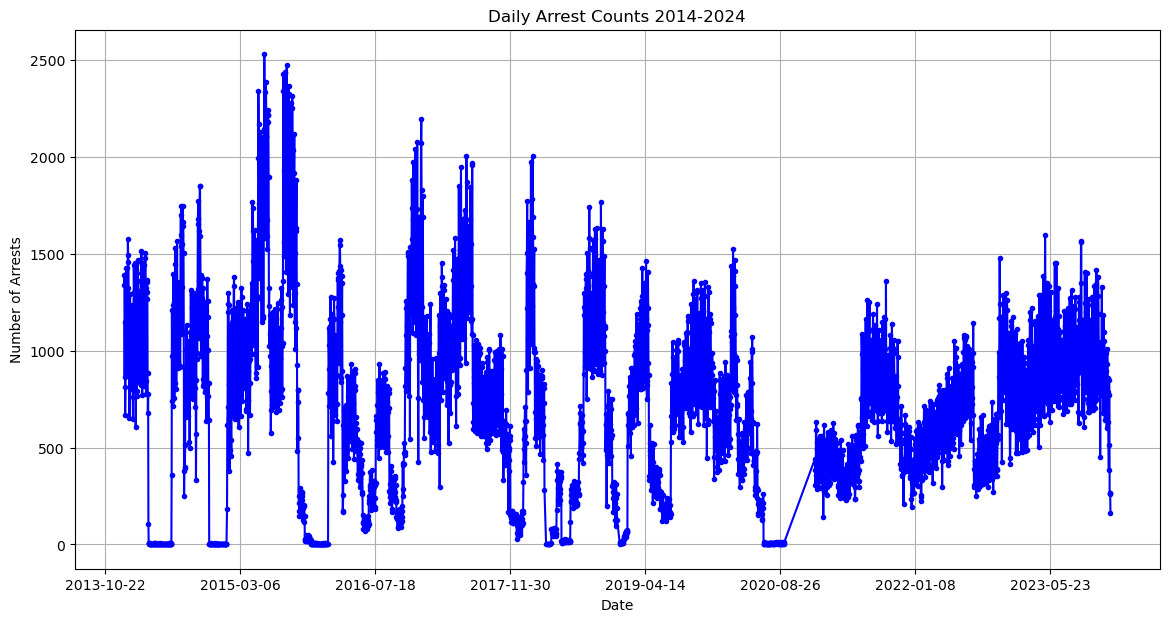

In [23]:
historical_df['arrest_date'] = pd.to_datetime(historical_df['arrest_date']).dt.date
arrest_counts = historical_df.groupby('arrest_date').size()

plt.figure(figsize=(14, 7))  
arrest_counts.plot(kind='line', color='blue', marker='.', linestyle='-')  

plt.title('Daily Arrest Counts 2014-2024')  # 
plt.xlabel('Date')  
plt.ylabel('Number of Arrests')  
plt.grid(True)  

# Improve the x-axis ticks to show fewer dates for clarity
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number as needed

plt.show()

In [17]:
historical_df['ofns_desc'].value_counts()

ofns_desc
ASSAULT 3 & RELATED OFFENSES              333635
DANGEROUS DRUGS                           309920
PETIT LARCENY                             220013
FELONY ASSAULT                            168920
VEHICLE AND TRAFFIC LAWS                  143723
                                           ...  
UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS         3
UNLAWFUL POSS. WEAP. ON SCHOOL                 3
KIDNAPPING AND RELATED OFFENSES                2
UNDER THE INFLUENCE, DRUGS                     1
NYS LAWS-UNCLASSIFIED VIOLATION                1
Name: count, Length: 87, dtype: int64

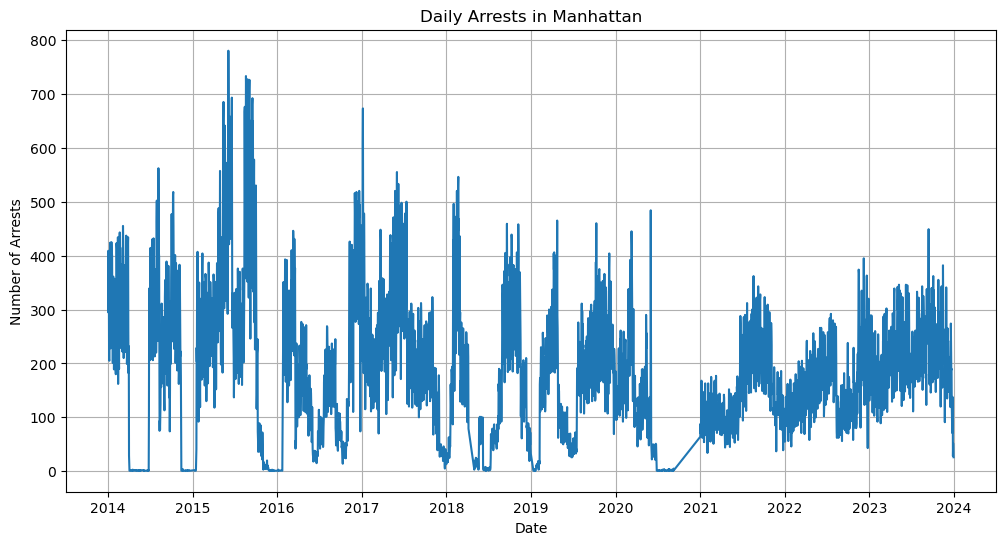

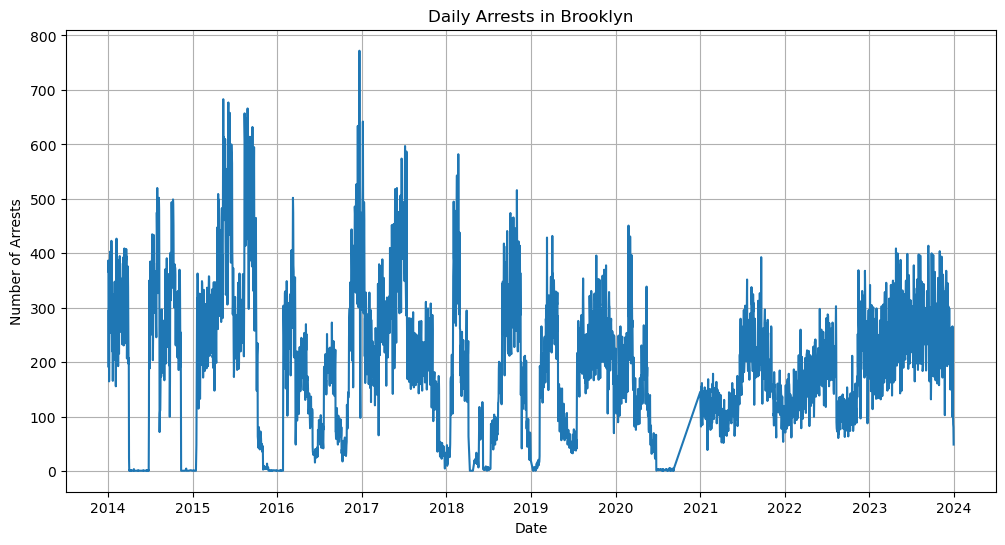

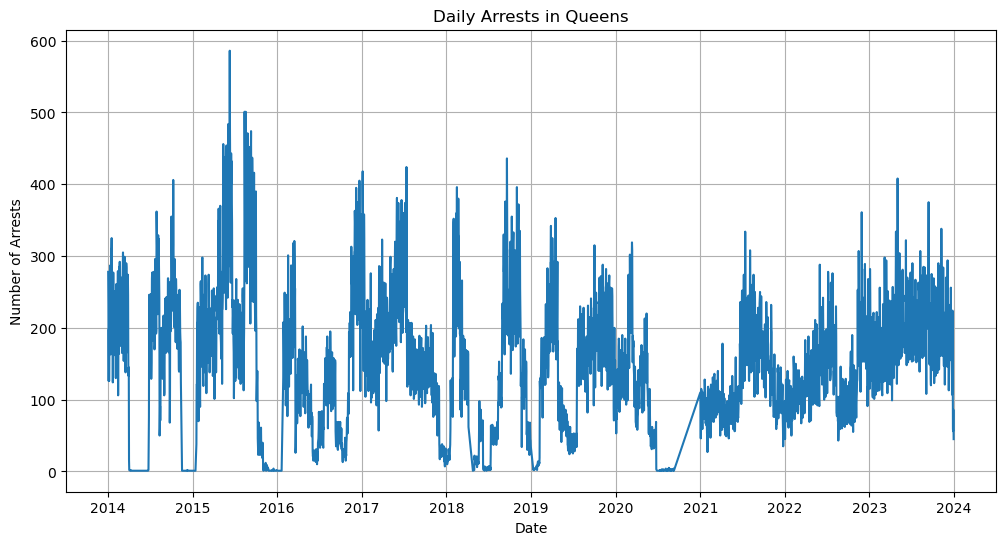

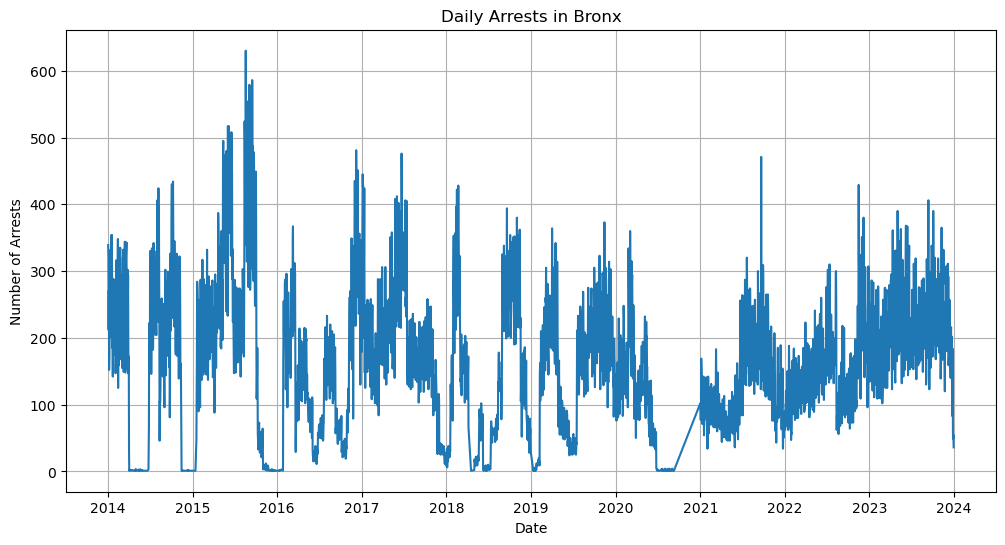

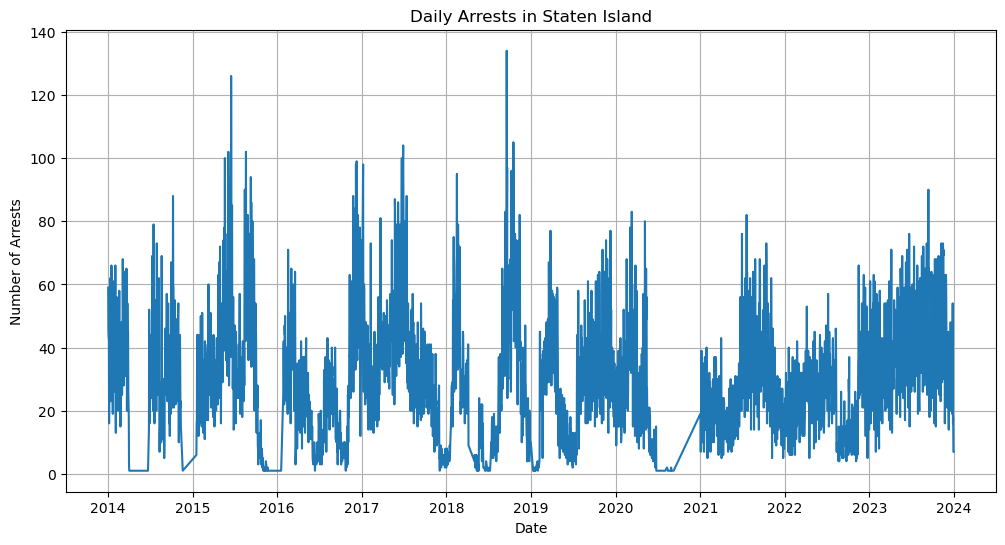

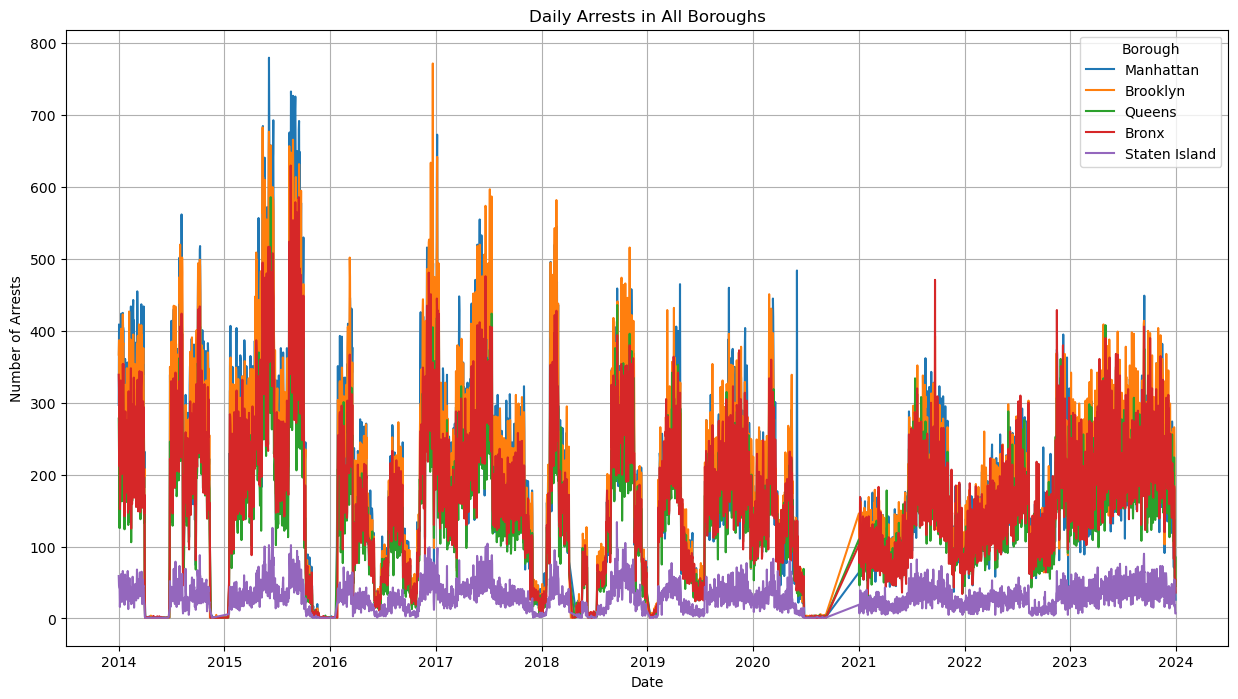

In [28]:
import matplotlib.pyplot as plt

# Define borough keys and labels for reference
borough_labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
borough_keys = ['M', 'K', 'Q', 'B', 'S']

# Plotting the data for each borough separately
for boro_key, boro_label in zip(borough_keys, borough_labels):
    # Filter data for the current borough
    borough_data = historical_df[historical_df['arrest_boro'] == boro_key]
    
    # Group by arrest_date and count the occurrences
    daily_counts = borough_data.groupby('arrest_date').size()
    
    # Plotting
    plt.figure(figsize=(12, 6))
    daily_counts.plot(title=f'Daily Arrests in {boro_label}')
    plt.xlabel('Date')
    plt.ylabel('Number of Arrests')
    plt.grid(True)
    plt.show()

# Combined plot for all boroughs
plt.figure(figsize=(15, 8))
for boro_key, boro_label in zip(borough_keys, borough_labels):
    # Filter data for the current borough
    borough_data = historical_df[historical_df['arrest_boro'] == boro_key]
    
    # Group by arrest_date and count the occurrences
    daily_counts = borough_data.groupby('arrest_date').size()
    
    # Plotting
    daily_counts.plot(kind='line', label=boro_label)

plt.title('Daily Arrests in All Boroughs')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.legend(title='Borough')
plt.grid(True)
plt.show()

In [7]:
print(historical_df.columns)

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'lon_lat'],
      dtype='object')


In [13]:
# Step 1: Group by 'boro' and 'crime_type' and count occurrences
crime_counts = historical_df.groupby(['arrest_boro', 'ofns_desc']).size().reset_index(name='count')

sorted_crimes = crime_counts.sort_values(by=['arrest_boro', 'count'], ascending=[True, False])

most_common_crimes = sorted_crimes.groupby('arrest_boro').head()

print(most_common_crimes)


    arrest_boro                        ofns_desc  count
8             B     ASSAULT 3 & RELATED OFFENSES  89288
17            B                  DANGEROUS DRUGS  88155
24            B                   FELONY ASSAULT  41873
67            B                    PETIT LARCENY  39802
78            B         VEHICLE AND TRAFFIC LAWS  33639
96            K                  DANGEROUS DRUGS  88918
87            K     ASSAULT 3 & RELATED OFFENSES  86537
148           K                    PETIT LARCENY  47208
104           K                   FELONY ASSAULT  46855
127           K          MISCELLANEOUS PENAL LAW  44748
176           M                  DANGEROUS DRUGS  89800
231           M                    PETIT LARCENY  81697
167           M     ASSAULT 3 & RELATED OFFENSES  61663
225           M  OTHER OFFENSES RELATED TO THEFT  45618
192           M                    GRAND LARCENY  38659
254           Q     ASSAULT 3 & RELATED OFFENSES  71944
263           Q                  DANGEROUS DRUGS